In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt

In [3]:
all_scores = pd.read_csv('./scores/scores_all.csv', index_col=0).T
all_scores['hue'] = 'all'
deg_scores = pd.read_csv('./scores/scores_degree_centrality.csv', index_col=0).T
deg_scores['hue'] = 'deg'
page_scores = pd.read_csv('./scores/scores_page_rank.csv', index_col=0).T
page_scores['hue'] = 'page'
lpa_scores = pd.read_csv('./scores/scores_lpa_community.csv', index_col=0).T
lpa_scores['hue'] = 'lpa'
none_scores = pd.read_csv('./scores/scores_none.csv', index_col=0).T
none_scores['hue'] = 'none'


FileNotFoundError: [Errno 2] No such file or directory: '../scores/scores_all.csv'

In [108]:
def plot_scores(first, second):
    df = pd.concat([first, second], axis = 0)
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    sns.barplot(data=df, x=df.index, y='Decision Tree', hue='hue', ax=axs[0, 0])
    sns.barplot(data=df, x=df.index, y='Random Forest', hue='hue', ax=axs[0, 1])
    sns.barplot(data=df, x=df.index, y='K-NN', hue='hue', ax=axs[0, 2])
    sns.barplot(data=df, x=df.index, y='MLP', hue='hue', ax=axs[0, 3])
    sns.barplot(data=df, x=df.index, y='SVM', hue='hue', ax=axs[1, 0])
    sns.barplot(data=df, x=df.index, y='LOF', hue='hue', ax=axs[1, 1])
    sns.barplot(data=df, x=df.index, y='IF', hue='hue', ax=axs[1, 2])
    plt.show()

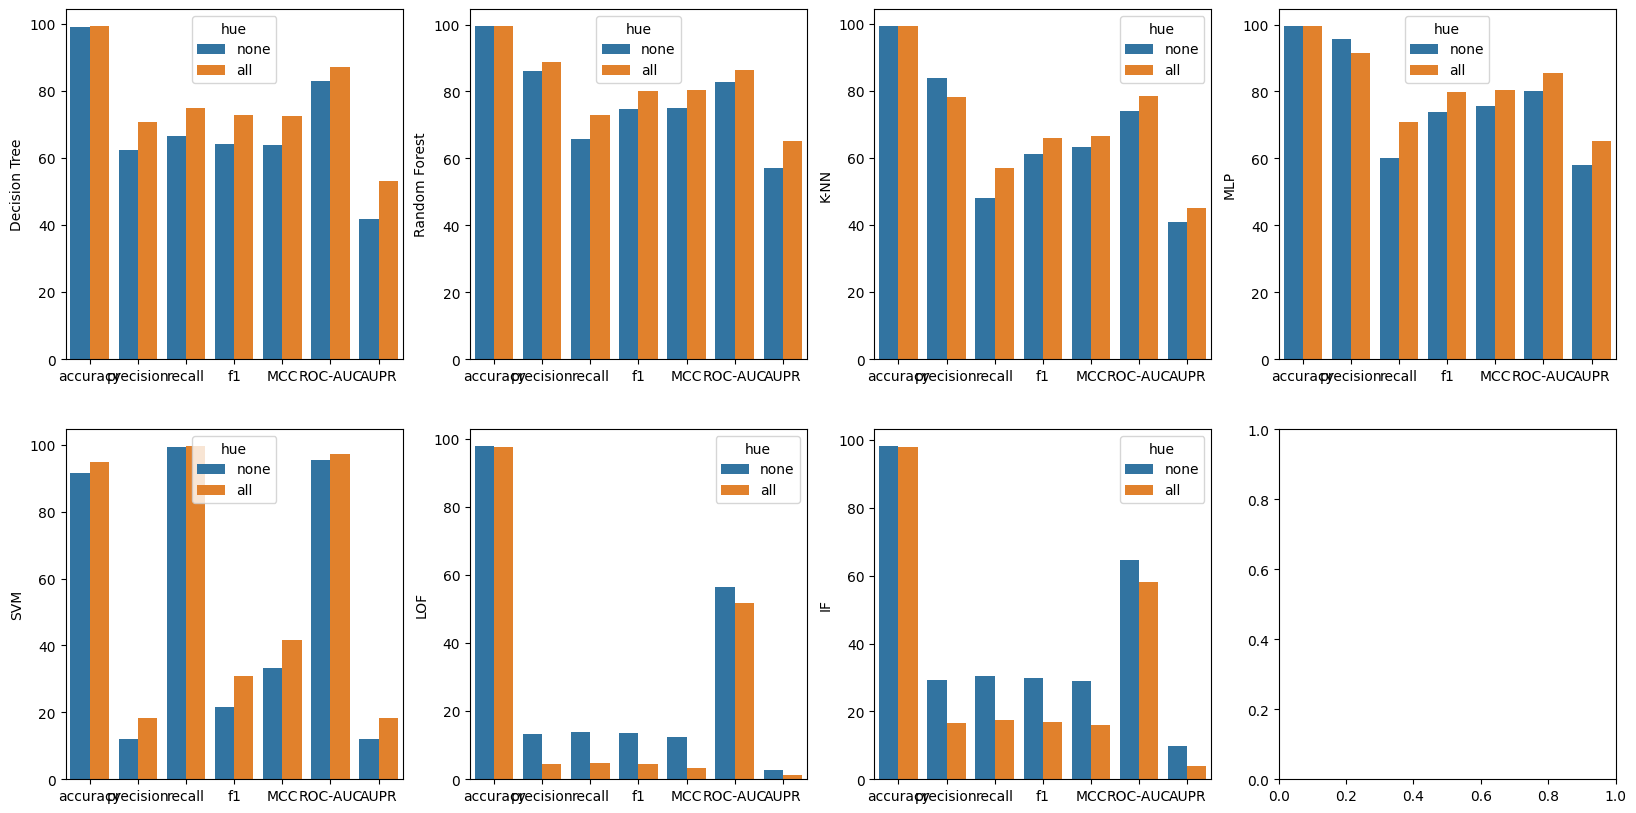

In [109]:
plot_scores(none_scores, all_scores)

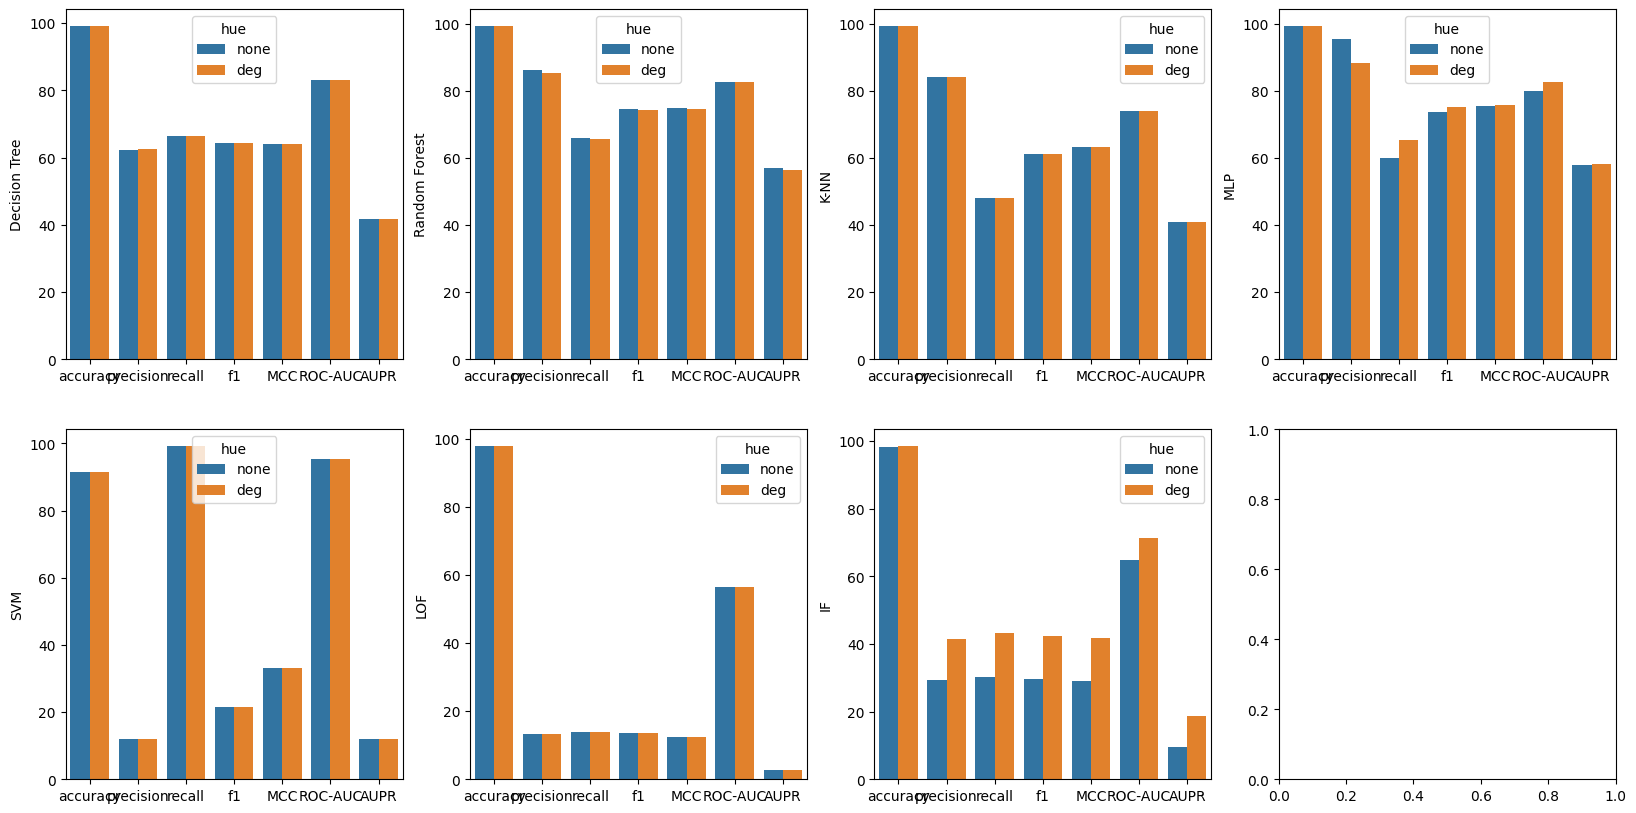

In [110]:
plot_scores(none_scores, deg_scores)

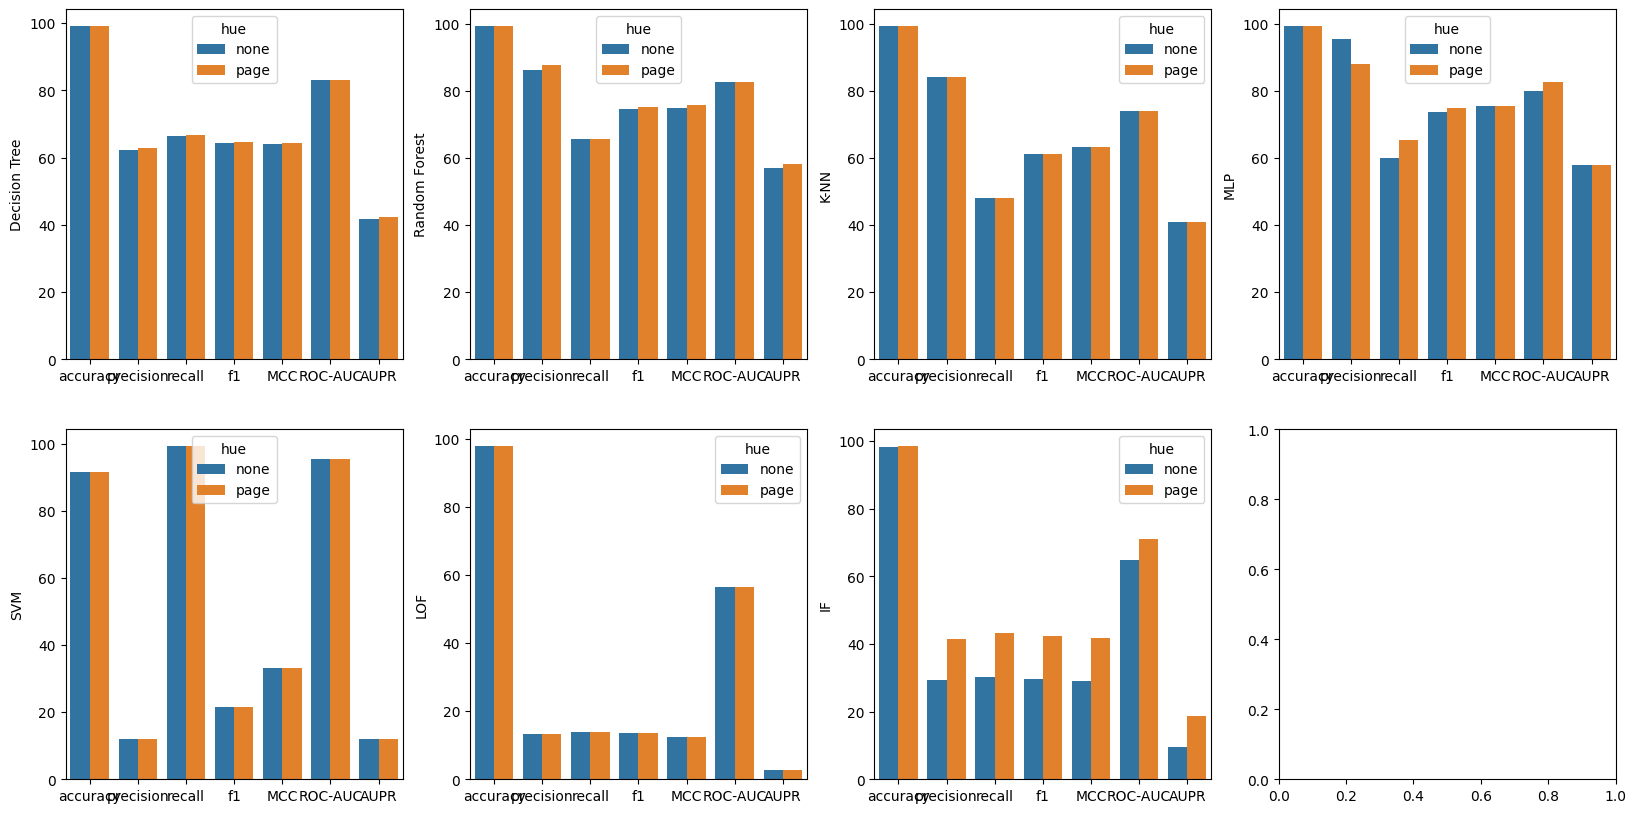

In [111]:
plot_scores(none_scores, page_scores)

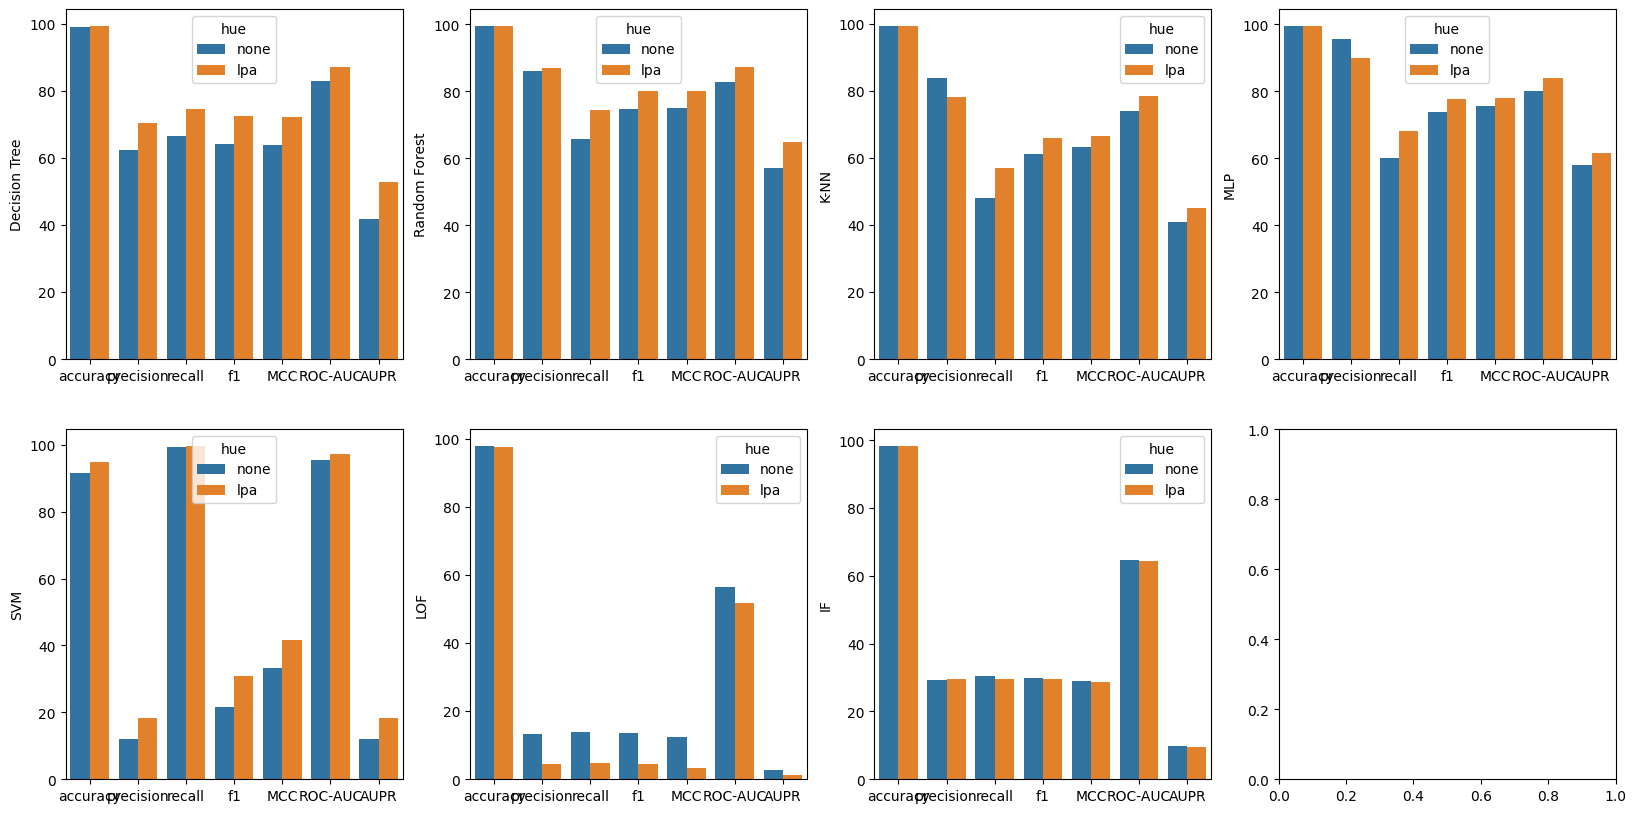

In [112]:
plot_scores(none_scores, lpa_scores)